In [109]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from pandas_profiling import ProfileReport
import seaborn as sn
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [110]:
import sqlalchemy as sa
import pandas as pd
from sqlalchemy import create_engine

In [111]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Tshidiso'

In [112]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

In [113]:
sql_query1 = "Select * from claims_data"


In [114]:
df = pd.read_sql_query(sql_query1, connection)

In [115]:
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.9,3009,0,yes,southwest,yes,16884.924
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
2,28,male,33,3009,3,no,southeast,no,0
3,33,male,22.705,10009,0,no,northwest,no,0
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                1338 non-null int64
sex                1338 non-null object
bmi                1338 non-null object
steps              1338 non-null int64
children           1338 non-null object
smoker             1338 non-null object
region             1338 non-null object
insurance_claim    1338 non-null object
claim_amount       1338 non-null object
dtypes: int64(2), object(7)
memory usage: 94.2+ KB


In [117]:
df['bmi'] = pd.to_numeric(df['bmi'])

In [118]:
df['claim_amount'] = pd.to_numeric(df['claim_amount'])

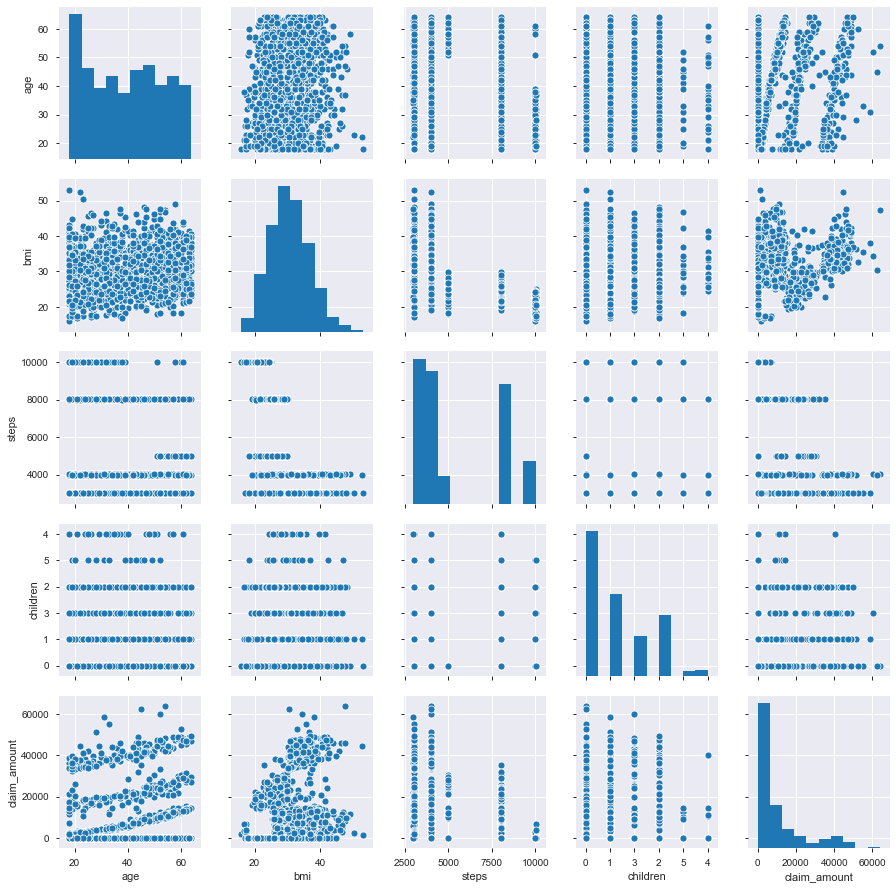

In [119]:
sn.pairplot(df)

In [120]:
df.describe()

,age,bmi,steps,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,9611.312287
std,14.049960,6.098187,2453.643236,13450.624483
min,18.000000,15.960000,3000.000000,0.000000
25%,27.000000,26.296250,3008.000000,0.000000
50%,39.000000,30.400000,4007.000000,2748.484475
75%,51.000000,34.693750,8004.000000,13045.979513
max,64.000000,53.130000,10010.000000,63770.428010


In [121]:
df.groupby(by='insurance_claim').count().T.iloc[0]

insurance_claim
no     555
yes    783
Name: age, dtype: int64

In [122]:
y = df.claim_amount.values

In [123]:
df.drop(['insurance_claim','claim_amount'], axis=1,inplace=True)

In [124]:
df.head()

,age,sex,bmi,steps,children,smoker,region
0,19,female,27.900,3009,0,yes,southwest
1,18,male,33.770,3008,1,no,southeast
2,28,male,33.000,3009,3,no,southeast
3,33,male,22.705,10009,0,no,northwest
4,32,male,28.880,8010,0,no,northwest


In [125]:
sql_query2 = "Select * from test_set"
test = pd.read_sql_query(sql_query2, connection)
test.head()

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.88,8049,0,no,southwest
1,2,20,female,26.265,7970,3,yes,southwest
2,3,32,female,26.025,2973,0,no,southwest
3,4,19,female,22.085,10427,1,yes,southwest
4,5,20,female,28.685,3972,0,yes,southwest


In [126]:
subm = test.row_id.values

In [127]:
test.drop(['row_id'], axis=1,inplace=True)

In [128]:
features = pd.concat([df, test],sort=False).reset_index(drop=True)
features['bmi'] = features['bmi'].astype(float)
features.head()

,age,sex,bmi,steps,children,smoker,region
0,19,female,27.900,3009,0,yes,southwest
1,18,male,33.770,3008,1,no,southeast
2,28,male,33.000,3009,3,no,southeast
3,33,male,22.705,10009,0,no,northwest
4,32,male,28.880,8010,0,no,northwest


In [129]:
final_features = pd.get_dummies(features, sparse=False, drop_first=True)
final_features.head()

,age,bmi,steps,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,3009,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3008,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3009,1,0,0,1,0,0,0,0,1,0
3,33,22.705,10009,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8010,1,0,0,0,0,0,0,1,0,0


In [130]:
X = final_features.iloc[:len(y), :]
test = final_features.iloc[len(y):, :]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 47)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression()

In [134]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
print(lm.intercept_)

-36976.57642918984


In [136]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,225.601280
bmi,928.675781
steps,1.122956
sex_male,380.569819
children_1,-2718.828128
children_2,-3383.618501
children_3,-6306.475484
children_4,-7923.187214
children_5,-4419.828870
smoker_yes,27961.597906


In [137]:
predictions = lm.predict(X_test)

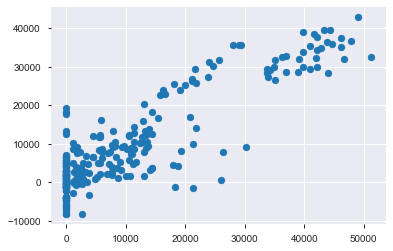

In [138]:
plt.scatter(y_test,predictions)

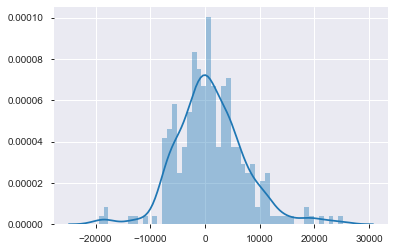

In [139]:
sn.distplot((y_test-predictions),bins=50);

In [140]:
from sklearn import metrics

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4729.454782305134
MSE: 41220681.56667943
RMSE: 6420.333446689466


In [142]:
test['bmi'] = pd.to_numeric(test['bmi'])


C:\Users\Tshidiso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
predictions = lm.predict(final_features)

In [144]:
submission = pd.DataFrame({'row_id' : len(subm),'predictions' : predictions.ravel()}) 

In [145]:
submission.head()

,row_id,predictions
0,300,23920.666626
1,300,-2120.599693
2,300,-4166.191647
3,300,2982.475528
4,300,6246.658015


In [146]:
submission.to_sql('regression_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)